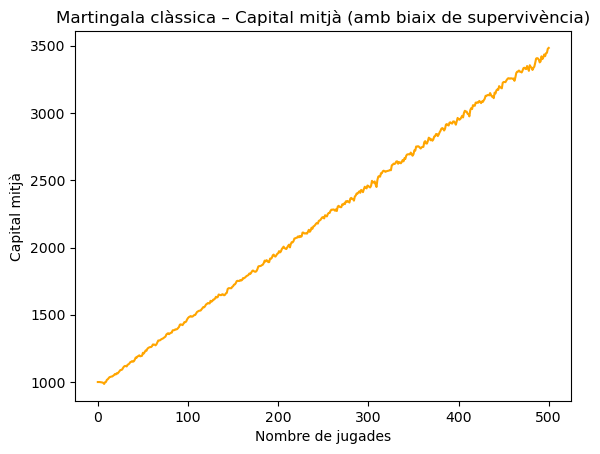

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Paràmetres globals
B0 = 1000        # capital inicial
n = 500          # nombre màxim de jugades
N = 1000         # nombre de simulacions
b0 = 10          # aposta inicial

p_guanyar = 18 / 37
p_perdre = 19 / 37

# Simulació amb biaix de supervivència
trajectories = []

for sim in range(N):
    B = B0
    k = 0  # pèrdues consecutives
    trajectoria = [B]

    for i in range(n):
        if B <= 0:
            break  # s'atura si hi ha ruïna

        # Definició de l'aposta (martingala)
        bi = (2 ** k) * b0

        if bi > B:
            B = 0
            trajectoria.append(B)
            break

        # Resultat aleatori
        Xi = np.random.choice([1, -1], p=[p_guanyar, p_perdre])
        B = B + bi * Xi
        trajectoria.append(B)

        # Actualització del comptador de pèrdues
        if Xi == -1:
            k += 1
        else:
            k = 0

    trajectories.append(trajectoria)

# Mitjana amb biaix (ignora ruïna)
max_len = max(len(t) for t in trajectories)
trajectories_padded = np.array([t + [np.nan]*(max_len-len(t)) for t in trajectories])
capital_mitja_biaix = np.nanmean(trajectories_padded, axis=0)

plt.figure()
plt.plot(capital_mitja_biaix, color='orange')
plt.xlabel("Nombre de jugades")
plt.ylabel("Capital mitjà")
plt.title("Martingala clàssica – Capital mitjà (amb biaix de supervivència)")
plt.show()
